In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
DATA_PATH = "../data/toy_data.csv"
DATA_PATH = "/Users/philipp/Documents/GitHub/ml-project-2-aiidalearn/data/toy_data.csv"

data = pd.read_csv(DATA_PATH)

In [3]:
data.columns

Index(['Unnamed: 0', 'ecutrho', 'k_density', 'ecutwfc', 'converged',
       'accuracy', 'total_energy', 'Ag', 'Al', 'Ar', 'As', 'Au', 'B', 'Ba',
       'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu',
       'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'He', 'Hf', 'Hg',
       'Ho', 'I', 'In', 'Ir', 'K', 'Kr', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo',
       'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pm',
       'Po', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Rn', 'Ru', 'S', 'Sb', 'Sc', 'Se',
       'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Ti', 'Tl', 'Tm', 'V',
       'W', 'Xe', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='object')

In [6]:
dE = data['accuracy'].to_numpy()
E = data['total_energy'].to_numpy()
plot_x_cols = ['ecutrho', 'k_density', 'ecutwfc']

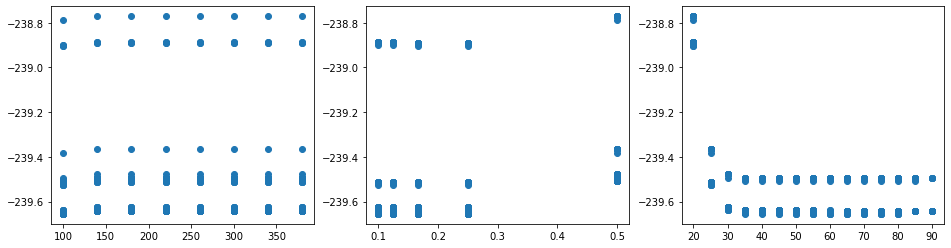

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for i, col in enumerate(plot_x_cols):
    ax[i].scatter(data[col], E)

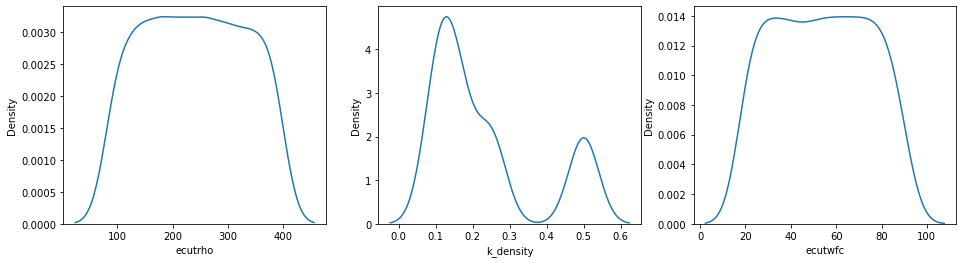

In [8]:
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for i, col in enumerate(plot_x_cols):
    sns.kdeplot(data[col], ax=ax[i])